In [1]:
import sympy
from tensorconvertor import SecondOrderTensor, FourthOrderTensor

sympy.init_printing(use_latex=True)

## Second-order

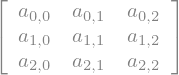

In [3]:
SecondOrderTensor().as_array()

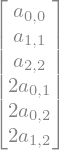

In [4]:
SecondOrderTensor().as_voigt_strain()

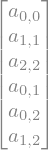

In [5]:
SecondOrderTensor().as_voigt_stress()

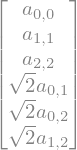

In [6]:
SecondOrderTensor().as_mandel()

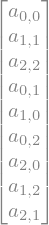

In [10]:
SecondOrderTensor().as_unsym()

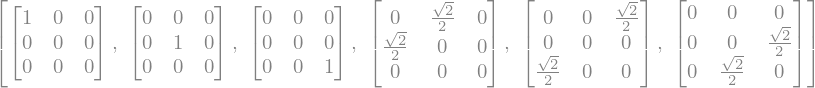

In [7]:
SecondOrderTensor().basis_mandel()

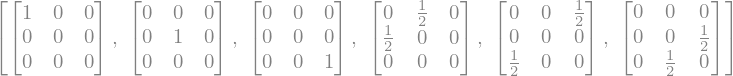

In [3]:
SecondOrderTensor().basis_voigt_strain()

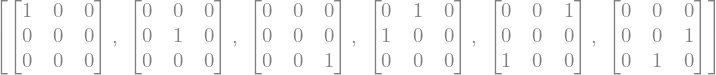

In [4]:
SecondOrderTensor().basis_voigt_stress()

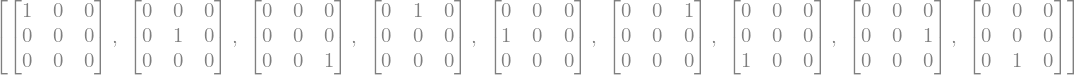

In [9]:
SecondOrderTensor().basis_unsym()

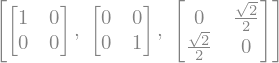

In [8]:
SecondOrderTensor(dim=2).basis_mandel()

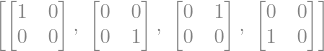

In [11]:
SecondOrderTensor(dim=2).basis_unsym()

## Fourth-order

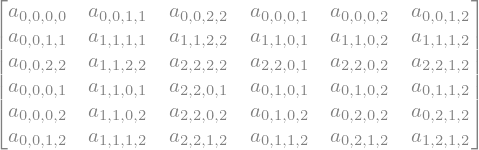

In [8]:
FourthOrderTensor(symmetry="major").as_voigt()

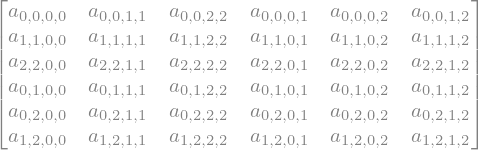

In [5]:
FourthOrderTensor(symmetry="minor").as_voigt()

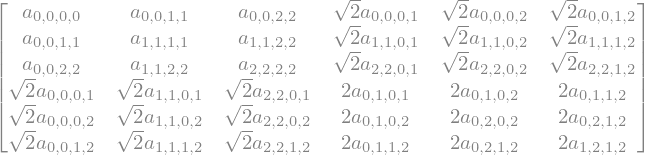

In [9]:
FourthOrderTensor(symmetry="major").as_mandel()

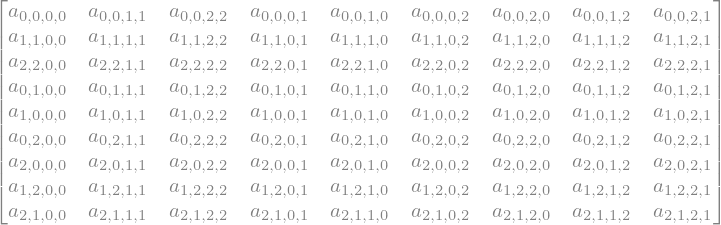

In [3]:
FourthOrderTensor(symmetry=None).as_unsym()

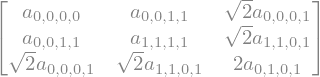

In [3]:
FourthOrderTensor(dim=2, symmetry="major").as_mandel()

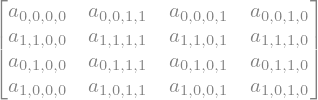

In [4]:
FourthOrderTensor(dim=2, symmetry=None).as_unsym()

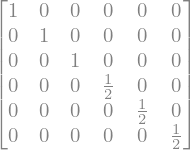

In [4]:
def identity(x):
    return x


FourthOrderTensor().from_operator(identity).as_voigt()

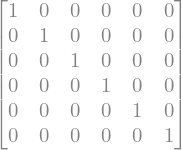

In [5]:
FourthOrderTensor().from_operator(identity).as_mandel()

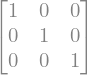

In [5]:
FourthOrderTensor(dim=2).from_operator(identity).as_mandel()

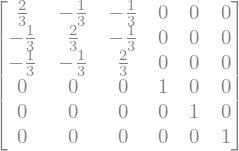

In [6]:
def dev(eps):
    dim = eps.shape[0]
    tr = sympy.trace(eps)
    return eps - tr / dim * sympy.eye(dim)


FourthOrderTensor().from_operator(dev).as_mandel()

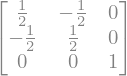

In [10]:
FourthOrderTensor(dim=2).from_operator(dev).as_mandel()

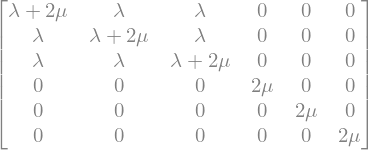

In [2]:
def linear_elastic(eps, dim=3):
    lmbda, mu = sympy.symbols("lambda, mu", positive=True)
    return lmbda * sympy.trace(eps) * sympy.eye(dim) + 2 * mu * eps


FourthOrderTensor().from_operator(linear_elastic).as_mandel()

In [3]:
FourthOrderTensor().from_mandel(
    FourthOrderTensor().from_operator(linear_elastic).as_mandel()
).as_voigt() == FourthOrderTensor().from_operator(linear_elastic).as_voigt()

True

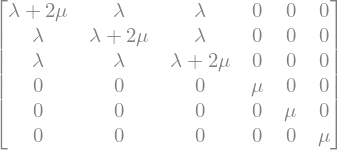

In [4]:
FourthOrderTensor().from_operator(linear_elastic).as_voigt()

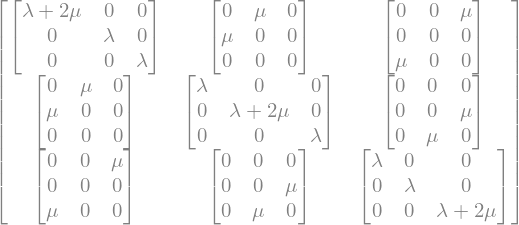

In [5]:
FourthOrderTensor().from_operator(linear_elastic).as_array()

In [6]:
FourthOrderTensor().from_voigt(
    FourthOrderTensor().from_operator(linear_elastic).as_voigt()
).as_mandel() == FourthOrderTensor().from_operator(linear_elastic).as_mandel()

True

In [18]:
a_voigt = sympy.randMatrix(6)
a_voigt = a_voigt + a_voigt.T
a = FourthOrderTensor().from_voigt(a_voigt).as_array()
FourthOrderTensor().from_array(a).as_voigt() == a_voigt

True

In [5]:
a_mandel = sympy.randMatrix(6)
a_mandel = a_mandel + a_mandel.T
a = FourthOrderTensor().from_mandel(a_mandel).as_array()
FourthOrderTensor().from_array(a).as_mandel() == a_mandel

True

In [12]:
a_unsym = sympy.randMatrix(9)
a = FourthOrderTensor(symmetry=None).from_unsym(a_unsym).as_array()
FourthOrderTensor(symmetry=None).from_array(a).as_unsym() == a_unsym

True

### Acoustic tensor

In [14]:
C = sympy.Matrix(sympy.MatrixSymbol("C", 6, 6))
for i in range(C.shape[0]):
    for j in range(i):
        C[i, j] = C[j, i]
C = FourthOrderTensor().from_mandel(C)

def acoustic_tensor(n_n):
    C_array = C.as_array()
    dim = 3
    A = sympy.zeros(dim)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                for l in range(dim):
                        A[i, k] += C_array[i, j, k, l] * n_n[j, l]
    return A


In [28]:
A = FourthOrderTensor().from_operator(acoustic_tensor)
A.as_mandel()

⎡         C₃₃     C₄₄                                   √2⋅C₃₄   ⎤
⎢ C₀₀     ───     ───        C₀₃           C₀₄          ──────   ⎥
⎢          2       2                                      2      ⎥
⎢                                                                ⎥
⎢ C₃₃             C₅₅                     √2⋅C₃₅                 ⎥
⎢ ───     C₁₁     ───        C₁₃          ──────         C₁₅     ⎥
⎢  2               2                        2                    ⎥
⎢                                                                ⎥
⎢ C₄₄     C₅₅               √2⋅C₄₅                               ⎥
⎢ ───     ───     C₂₂       ──────         C₂₄           C₂₅     ⎥
⎢  2       2                  2                                  ⎥
⎢                                                                ⎥
⎢                √2⋅C₄₅         C₃₃    √2⋅C₀₅   C₃₄  √2⋅C₁₄   C₃₅⎥
⎢ C₀₃     C₁₃    ──────   C₀₁ + ───    ────── + ───  ────── + ───⎥
⎢                  2             2       2       2     2      

In [27]:
n = sympy.IndexedBase("n")
n = sympy.Matrix([n[i] for i in range(3)])
n_n = n * n.T
n_n = SecondOrderTensor().from_array(n_n)
n_n.as_mandel()

⎡       2    ⎤
⎢   n[0]     ⎥
⎢            ⎥
⎢       2    ⎥
⎢   n[1]     ⎥
⎢            ⎥
⎢       2    ⎥
⎢   n[2]     ⎥
⎢            ⎥
⎢√2⋅n[0]⋅n[1]⎥
⎢            ⎥
⎢√2⋅n[0]⋅n[2]⎥
⎢            ⎥
⎣√2⋅n[1]⋅n[2]⎦

In [30]:
sympy.simplify(A.as_mandel() * n_n.as_mandel())

⎡                                                                         2   
⎢                       2                                             n[1] ⋅C₃
⎢                   n[0] ⋅C₀₀ + √2⋅n[0]⋅n[1]⋅C₀₃ + √2⋅n[0]⋅n[2]⋅C₀₄ + ────────
⎢                                                                         2   
⎢                                                                             
⎢                       2                                                     
⎢                   n[0] ⋅C₃₃                                          2      
⎢                   ───────── + √2⋅n[0]⋅n[1]⋅C₁₃ + n[0]⋅n[2]⋅C₃₅ + n[1] ⋅C₁₁ +
⎢                       2                                                     
⎢                                                                             
⎢                       2                                              2      
⎢                   n[0] ⋅C₄₄                                      n[1] ⋅C₅₅  
⎢                   ───────── + n[0]⋅n[1]⋅C₄₅ + √2⋅n

In [46]:
C = sympy.Matrix(sympy.MatrixSymbol("C", 9, 9))
C = FourthOrderTensor().from_unsym(C)

def acoustic_tensor(n_n):
    C_array = C.as_array()
    dim = 3
    A = sympy.zeros(dim)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                for l in range(dim):
                        A[i, k] += C_array[i, j, k, l] * n_n[j, l]
    return A


In [47]:
A = FourthOrderTensor().from_operator(acoustic_tensor)
A.as_unsym()

⎡C₀₀  C₃₃  C₅₅  C₀₃  C₃₀  C₀₅  C₅₀  C₃₅  C₅₃⎤
⎢                                           ⎥
⎢C₄₄  C₁₁  C₇₇  C₄₁  C₁₄  C₄₇  C₇₄  C₁₇  C₇₁⎥
⎢                                           ⎥
⎢C₆₆  C₈₈  C₂₂  C₆₈  C₈₆  C₆₂  C₂₆  C₈₂  C₂₈⎥
⎢                                           ⎥
⎢C₀₄  C₃₁  C₅₇  C₀₁  C₃₄  C₀₇  C₅₄  C₃₇  C₅₁⎥
⎢                                           ⎥
⎢C₄₀  C₁₃  C₇₅  C₄₃  C₁₀  C₄₅  C₇₀  C₁₅  C₇₃⎥
⎢                                           ⎥
⎢C₀₆  C₃₈  C₅₂  C₀₈  C₃₆  C₀₂  C₅₆  C₃₂  C₅₈⎥
⎢                                           ⎥
⎢C₆₀  C₈₃  C₂₅  C₆₃  C₈₀  C₆₅  C₂₀  C₈₅  C₂₃⎥
⎢                                           ⎥
⎢C₄₆  C₁₈  C₇₂  C₄₈  C₁₆  C₄₂  C₇₆  C₁₂  C₇₈⎥
⎢                                           ⎥
⎣C₆₄  C₈₁  C₂₇  C₆₁  C₈₄  C₆₇  C₂₄  C₈₇  C₂₁⎦

In [48]:
sympy.simplify(A.as_unsym() * n_n.as_unsym())

⎡    2                                                                        
⎢n[0] ⋅C₀₀ + n[0]⋅n[1]⋅C₀₃ + n[0]⋅n[1]⋅C₃₀ + n[0]⋅n[2]⋅C₀₅ + n[0]⋅n[2]⋅C₅₀ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₄₄ + n[0]⋅n[1]⋅C₁₄ + n[0]⋅n[1]⋅C₄₁ + n[0]⋅n[2]⋅C₄₇ + n[0]⋅n[2]⋅C₇₄ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₆₆ + n[0]⋅n[1]⋅C₆₈ + n[0]⋅n[1]⋅C₈₆ + n[0]⋅n[2]⋅C₂₆ + n[0]⋅n[2]⋅C₆₂ + n
⎢                                                                             
⎢    2                                                                        
⎢n[0] ⋅C₀₄ + n[0]⋅n[1]⋅C₀₁ + n[0]⋅n[1]⋅C₃₄ + n[0]⋅n[2]⋅C₀₇ + n[0]⋅n[2]⋅C₅₄ + n
⎢                                                                             
⎢    2                                              